In [108]:
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [24]:
def add_data_to_df(schools):
    '''
        function which creates numpy array of university data: programme, uni, loc, cost, duration
    '''
    info = []
    for i in schools:
        print(i)
        x = i.text.split("\n")
        s=""
        try:
            info.append([x[0], x[1], x[2], int(s.join(re.findall('\d', x[4])).replace(" ", "")), int(x[5][0])])
        except:
            info.append([x[0], x[1], x[2], int(s.join(re.findall('\d', x[4])).replace(" ", "")), None])
    return info

webscraping for cs programmes 

In [25]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
driver.get("https://www.bachelorsportal.com/countries/1/netherlands.html?utm_source=google&utm_medium=cpc"
           "&utm_campaign=Eastern_Europe_-_BP_-_Generic_-_Search_-_TG_-_Exact-registration&gclid"
           "=CjwKCAjwjdOIBhA_EiwAHz8xm_c02RL_2MWfqu0ZZiCe2y8szwLJnNxhR2MaS-P7_GvZVUvjpxjl6BoCfwIQAvD_BwE")
time.sleep(3)

search_cs = driver.find_element_by_xpath('//input[@id="KeywordInput"]')
search_cs.send_keys('computer science')
search_cs.send_keys(Keys.RETURN)
time.sleep(3)

schools = driver.find_elements_by_xpath('//section[@class="InformationContainer"]')
print(len(schools))
data = np.array(add_data_to_df(schools))
time.sleep(5)

element = driver.find_element_by_xpath("/html/body/div[2]/article/div/article/div[5]/div/nav/ul/li[6]/button")
driver.execute_script("arguments[0].click();", element)
time.sleep(3)

schools = (driver.find_elements_by_xpath('//section[@class="InformationContainer"]'))
print(len(schools))
data = np.vstack([data, add_data_to_df(schools)])
time.sleep(5)

element = driver.find_element_by_xpath("/html/body/div[2]/article/div/article/div[5]/div/nav/ul/li[6]/button")
driver.execute_script("arguments[0].click();", element)
time.sleep(3)

schools = (driver.find_elements_by_xpath('//section[@class="InformationContainer"]'))
print(len(schools))
data = np.vstack([data, add_data_to_df(schools)])

10
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="de16497f-dae0-4d16-a6ba-51f0b84afbac")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="5167d179-3265-4078-9919-4bc66fd97aad")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="c51ffdbe-eae7-448c-8600-4ccd16bd19af")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="4c09f861-b7d4-41e0-8b3c-70e90f9a75e5")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="180f4e63-da1b-473e-b0db-b121a43e82a5")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="442b3cd8-99cf-42ac-9b28-78f577627b9a")>
<selenium.webdriver.remote.webelement.WebElement (session="1bd09eb234bb190b7241608b22495771", element="804affa6-87df-4fe5-a9df-a4f0173411de

creating pandas df for better clarity

In [64]:
df = pd.DataFrame(data, columns=['programme', 'university', 'location', 'cost[eur]', 'duration[years]'])

In [65]:
df

,programme,university,location,cost[eur],duration[years]
0,Computing Science,Radboud University,"Nijmegen, Netherlands",2143,3
1,Computing Science,University of Groningen,"Groningen, Netherlands",2168,3
2,Technical Computer Science,University of Twente (UT),"Enschede, Netherlands",2168,3
3,Computer Science,Vrije Universiteit Amsterdam,"Amsterdam, Netherlands",1084,3
4,Applied Computer Science,Saxion University of Applied Sciences,"Enschede, Netherlands",2168,4
5,Data Science and Artificial Intelligence,Maastricht University,"Maastricht, Netherlands",2168,3
6,Computer Science and Engineering,Eindhoven University of Technology (TU/e),"Eindhoven, Netherlands",2168,3
7,Cognitive Science and Artificial Intelligence,Tilburg University,"Tilburg, Netherlands",2143,3
8,Data Science,Tilburg University,Multiple locations,2143,3
9,Artificial Intelligence,Radboud University,"Nijmegen, Netherlands",2143,3


In [66]:
df.dtypes

programme          object
university         object
location           object
cost[eur]          object
duration[years]    object
dtype: object

In [67]:
df["cost[eur]"] = pd.to_numeric(df["cost[eur]"], errors='coerce')
df["duration[years]"] = pd.to_numeric(df["duration[years]"], errors='coerce')

<AxesSubplot:xlabel='cost[eur]', ylabel='programme'>

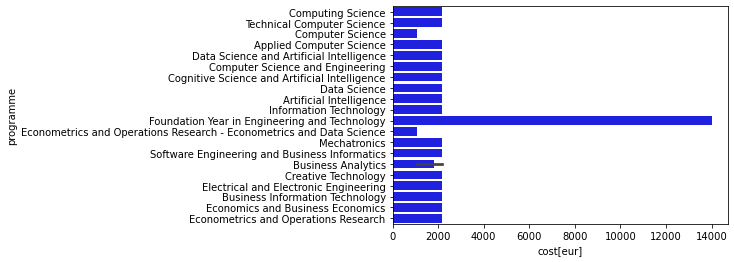

In [68]:
sns.barplot(x="cost[eur]", y="programme", data=df, label="Computer Science programmes offered in the Netherlands", color="b")

as some programmes have the same name seaborn didn't use duplicate programmes, to check if my hypothesis is correct I will count unique vals in programme column, which I find is the same number as the programmes show in the plot

In [69]:
len(df.programme.unique())

20

[Text(0, 0, 'Computing Science'),
 Text(0, 1, 'Computing Science'),
 Text(0, 2, 'Technical Computer Science'),
 Text(0, 3, 'Computer Science'),
 Text(0, 4, 'Applied Computer Science'),
 Text(0, 5, 'Data Science and Artificial Intelligence'),
 Text(0, 6, 'Computer Science and Engineering'),
 Text(0, 7, 'Cognitive Science and Artificial Intelligence'),
 Text(0, 8, 'Data Science'),
 Text(0, 9, 'Artificial Intelligence'),
 Text(0, 10, 'Information Technology'),
 Text(0, 11, 'Information Technology'),
 Text(0, 12, 'Foundation Year in Engineering and Technology'),
 Text(0, 13, 'Data Science'),
 Text(0, 14, 'Econometrics and Operations Research - Econometrics and Data Science'),
 Text(0, 15, 'Artificial Intelligence'),
 Text(0, 16, 'Mechatronics'),
 Text(0, 17, 'Software Engineering and Business Informatics'),
 Text(0, 18, 'Business Analytics'),
 Text(0, 19, 'Creative Technology'),
 Text(0, 20, 'Business Analytics'),
 Text(0, 21, 'Electrical and Electronic Engineering'),
 Text(0, 22, 'Busines

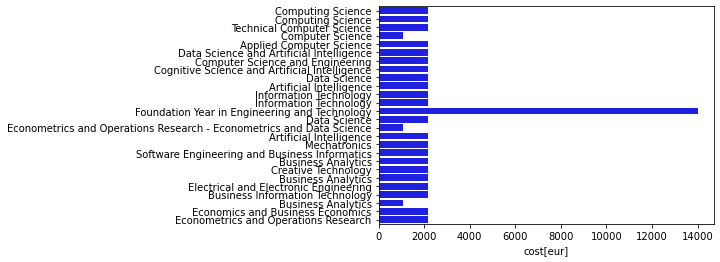

In [70]:
plot = sns.barplot(x="cost[eur]", y=df.index, data=df, label="Computer Science programmes offered in the Netherlands", color="b", orient='h')
plot.set_yticklabels(df.programme)

now there are all the programmes, even duplicates, however we can see that there is one outlier which makes the plot unreadable and so we are going to disregard the programme

for the sake of science and curiosity I'm going to find the outlier by normal distribution 

In [88]:
def eliminate_noise(values, std_factor=1):
    if not values:
        return values
    values = np.array(values)
    mean = np.mean(values)
    standard_deviation = np.std(values)

    if standard_deviation == 0:
        return values

    final_values = [element for element in values if element > mean - std_factor * standard_deviation]
    final_values = [element for element in final_values if element < mean + std_factor * standard_deviation]

    return final_values

In [102]:
cost = df["cost[eur]"].tolist()
no_outliers = eliminate_noise(cost)
print(len(no_outliers), no_outliers)

22 [2143, 2168, 2168, 2168, 2168, 2168, 2143, 2143, 2143, 2168, 2168, 2143, 2168, 2143, 2143, 2168, 2168, 2168, 2143, 2168, 2168, 2168]


as expected, the 14000dollar programme has been eliminated

In [103]:
indexes = df[ df['cost[eur]'] == 14000 ].index
df.drop(indexes , inplace=True)
df["cost[eur]"] == 14000

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: cost[eur], dtype: bool

[Text(0, 0, 'Vrije Universiteit Amsterdam - Business Analytics'),
 Text(0, 1, 'Vrije Universiteit Amsterdam - Computer Science'),
 Text(0, 2, 'Vrije Universiteit Amsterdam - Econometrics and Operations Research - Econometrics and Data Science'),
 Text(0, 3, 'Tilburg University - Data Science'),
 Text(0, 4, 'Tilburg University - Cognitive Science and Artificial Intelligence'),
 Text(0, 5, 'Radboud University - Artificial Intelligence'),
 Text(0, 6, 'Jheronimus Academy of Data Science (JADS) - Data Science'),
 Text(0, 7, 'Fontys University of Applied Sciences - Software Engineering and Business Informatics'),
 Text(0, 8, 'Saxion University of Applied Sciences - Electrical and Electronic Engineering'),
 Text(0, 9, 'Radboud University - Computing Science'),
 Text(0, 10, 'Fontys University of Applied Sciences - Mechatronics'),
 Text(0, 11, 'Maastricht University - Business Analytics'),
 Text(0, 12, 'University of Twente (UT) - Business Information Technology'),
 Text(0, 13, 'University of T

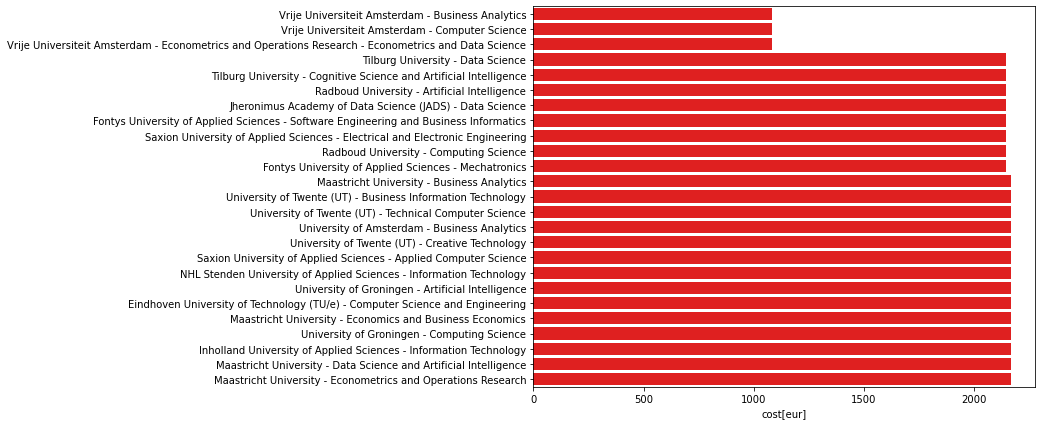

In [115]:
df = df.sort_values(by=["cost[eur]"])
df = df.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(9, 7))
plot = sns.barplot(x="cost[eur]", y=df.index, data=df, label="Computer Science programmes offered in the Netherlands", color='r', orient='h', ax=ax)
plot.set_yticklabels(df.university +" - "+ df.programme)